In [9]:
import numpy as np
import pandas as pd

In [10]:
data = pd.read_csv("data/Student_Performance.csv")
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [12]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 9254 to 7270
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     8000 non-null   int64  
 1   Previous Scores                   8000 non-null   int64  
 2   Extracurricular Activities        8000 non-null   object 
 3   Sleep Hours                       8000 non-null   int64  
 4   Sample Question Papers Practiced  8000 non-null   int64  
 5   Performance Index                 8000 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 437.5+ KB


In [13]:
train_set.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4.983250,69.531000,6.541625,4.616500,55.311500
std,2.594862,17.343735,1.698493,2.861241,19.202059
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.750000,5.000000,2.000000,40.000000
50%,5.000000,70.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


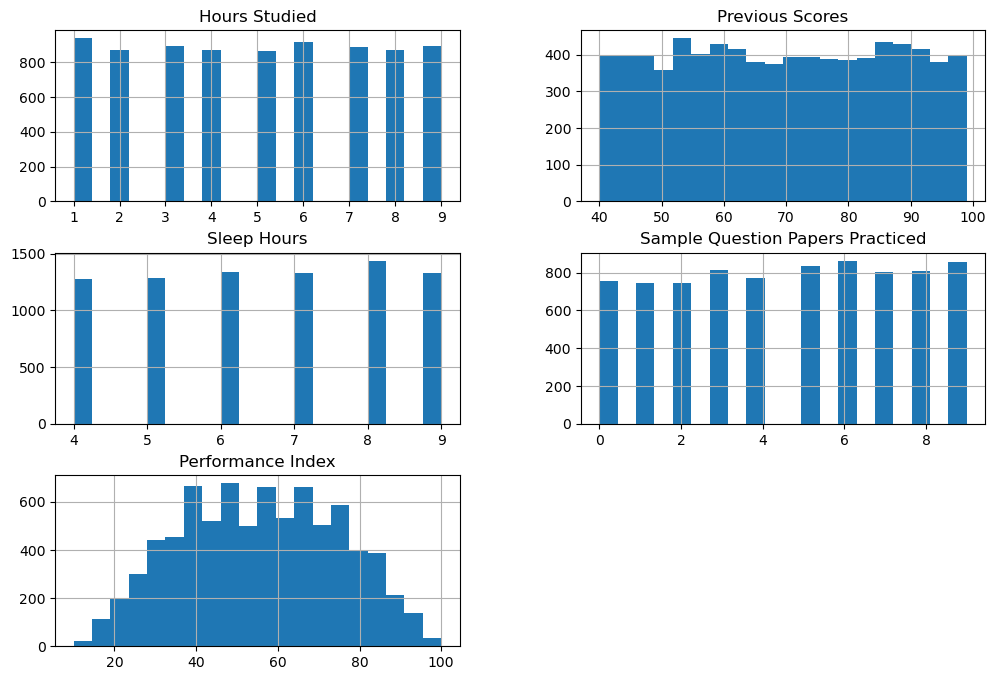

In [14]:
import matplotlib.pyplot as plt

train_set.hist(bins=20, figsize=(12, 8))
plt.show()

In [16]:
def preprocessing(pd_data):
    #remove columns
    pd_data['Extracurricular Activities'] = pd_data['Extracurricular Activities'].apply(lambda x: 1 if x == 'Yes' else 0)
    return pd_data.drop(columns= ['Performance Index']), pd_data['Performance Index']

preprocessing(train_set)[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 9254 to 7270
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     8000 non-null   int64
 1   Previous Scores                   8000 non-null   int64
 2   Extracurricular Activities        8000 non-null   int64
 3   Sleep Hours                       8000 non-null   int64
 4   Sample Question Papers Practiced  8000 non-null   int64
dtypes: int64(5)
memory usage: 375.0 KB


In [47]:
import statsmodels.api as sm
from patsy import dmatrix

train_X, train_Y = preprocessing(train_set)
test_X, test_Y = preprocessing(test_set)


In [86]:
def prepare_data(data):
    # we now fit a GAM to predict wage using natural spline functions of year and age, treating education as a qualitative (i.e. categorical) predictor.
    Hours_Studied = dmatrix("cr(Hours_Studied, df=3)", {"Hours_Studied": data['Hours Studied']}, return_type='dataframe')
    Previous_Scores = dmatrix("cr(Previous_Scores, df=3)", {"Previous_Scores": data['Previous Scores']}, return_type='dataframe')
    Sleep_Hours = dmatrix("cr(Sleep_Hours, df=3)", {"Sleep_Hours": data['Sleep Hours']}, return_type='dataframe')
    Sample_Question_Papers_Practiced = dmatrix("cr(Sample_Question_Papers_Practiced, df=3)", {"Sample_Question_Papers_Practiced": data['Sample Question Papers Practiced']}, return_type='dataframe')

    # we concatenate all the predictors
    x_all = pd.concat([Hours_Studied, Previous_Scores, data['Extracurricular Activities'], Sleep_Hours, Sample_Question_Papers_Practiced], axis=1)
    return x_all

In [87]:
x_all = prepare_data(train_X)
x_all

,Intercept,"cr(Hours_Studied, df=3)[0]","cr(Hours_Studied, df=3)[1]","cr(Hours_Studied, df=3)[2]",Intercept,"cr(Previous_Scores, df=3)[0]","cr(Previous_Scores, df=3)[1]","cr(Previous_Scores, df=3)[2]",Extracurricular Activities,Intercept,"cr(Sleep_Hours, df=3)[0]","cr(Sleep_Hours, df=3)[1]","cr(Sleep_Hours, df=3)[2]",Intercept,"cr(Sample_Question_Papers_Practiced, df=3)[0]","cr(Sample_Question_Papers_Practiced, df=3)[1]","cr(Sample_Question_Papers_Practiced, df=3)[2]"
9254,1.0,0.000000,1.000000,0.000000,1.0,0.625743,0.443429,-0.069172,0,1.0,-0.072,0.944,0.128,1.0,-0.046639,0.982167,0.064472
1561,1.0,0.691406,0.367188,-0.058594,1.0,0.666003,0.396808,-0.062811,0,1.0,-0.072,0.944,0.128,1.0,-0.092593,0.851852,0.240741
1670,1.0,0.691406,0.367188,-0.058594,1.0,-0.095750,0.801669,0.294081,0,1.0,-0.072,0.944,0.128,1.0,0.466392,0.622771,-0.089163
6087,1.0,0.691406,0.367188,-0.058594,1.0,0.747866,0.300878,-0.048744,0,1.0,0.128,0.944,-0.072,1.0,0.724966,0.327846,-0.052812
6669,1.0,-0.058594,0.367188,0.691406,1.0,0.706730,0.349252,-0.055982,0,1.0,0.000,0.000,1.000,1.0,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1.0,-0.058594,0.367188,0.691406,1.0,0.586009,0.488998,-0.075008,0,1.0,0.128,0.944,-0.072,1.0,-0.092593,0.851852,0.240741
5191,1.0,0.167969,0.914062,-0.082031,1.0,0.027330,0.996188,-0.023517,0,1.0,0.000,0.000,1.000,1.0,0.240741,0.851852,-0.092593
5390,1.0,0.000000,0.000000,1.000000,1.0,0.666003,0.396808,-0.062811,0,1.0,-0.072,0.944,0.128,1.0,-0.092593,0.851852,0.240741
860,1.0,1.000000,0.000000,0.000000,1.0,0.706730,0.349252,-0.055982,0,1.0,0.000,0.000,1.000,1.0,1.000000,0.000000,0.000000


In [88]:
# fit a model and print the summary
gam1_fit = sm.OLS(train_Y, x_all).fit()
print(gam1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 7.592e+04
Date:                Thu, 24 Oct 2024   Prob (F-statistic):               0.00
Time:                        19:47:13   Log-Likelihood:                -17150.
No. Observations:                8000   AIC:                         3.432e+04
Df Residuals:                    7990   BIC:                         3.439e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [51]:
pred = gam1_fit.predict(prepare_data(test_X))

In [52]:
from sklearn.metrics import r2_score
r2_score(test_Y, pred)

0.9886894435601793

In [54]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_Y, pred)
mae

1.6307209033474848

In [55]:
gam1_fit.params

Intercept                                        3.343523e+12
cr(Hours_Studied, df=5)[0]                       6.779276e+11
cr(Hours_Studied, df=5)[1]                       6.779276e+11
cr(Hours_Studied, df=5)[2]                       6.779276e+11
cr(Hours_Studied, df=5)[3]                       6.779276e+11
cr(Hours_Studied, df=5)[4]                       6.779276e+11
Intercept                                        5.841707e+11
cr(Previous_Scores, df=5)[0]                     6.624201e+11
cr(Previous_Scores, df=5)[1]                     6.624201e+11
cr(Previous_Scores, df=5)[2]                     6.624201e+11
cr(Previous_Scores, df=5)[3]                     6.624201e+11
cr(Previous_Scores, df=5)[4]                     6.624201e+11
Extracurricular Activities                       2.615988e+09
Intercept                                        5.597680e+11
cr(Sleep_Hours, df=5)[0]                        -9.148267e+10
cr(Sleep_Hours, df=5)[1]                        -9.148267e+10
cr(Sleep

In [83]:
import matplotlib.pyplot as plt
x = np.linspace(40, 10000, 10000)
Hours_Studied = dmatrix("cr(x, df=5)", {"x": x})
b = np.array([ 5.841707, 6.624201, 6.624201, 6.624201, 6.624201, 6.624201])


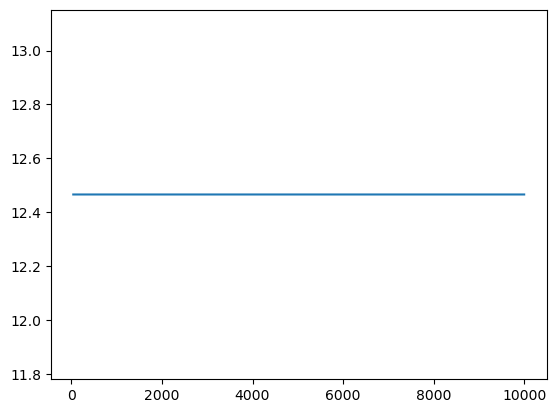

In [84]:
plt.plot(x, np.dot(Hours_Studied, b))